In [1]:
import numpy as np
from numpy import ma
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

In [2]:
n = 100
x, y = np.meshgrid(np.linspace(-3.0, 3.0, n), np.linspace(-2.0, 2.0, n))

# a low hump with a spike coming out.
# needs to have z/colour axis on a log scale so we see both hump and spike.
# linear scale only shows the spike.
z1 = np.exp(-x ** 2 - y ** 2)
z2 = np.exp(-(x * 10) ** 2 - (y * 10) ** 2)
z = z1 + 50 * z2

# put in some negative values (lower left corner) to cause trouble with logs:
z[:5, :5] = -1

# the following is not strictly essential, but it will eliminate a warning.
# comment it out to see the warning.
z = ma.masked_where(z <= 0, z)

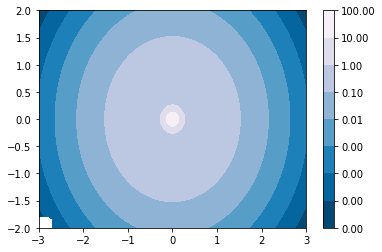

In [3]:
# automatic selection of levels works; setting the
# log locator tells contourf to use a log scale:
fig, ax = plt.subplots()

cs = ax.contourf(x, y, z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
cbar = fig.colorbar(cs)

plt.show()

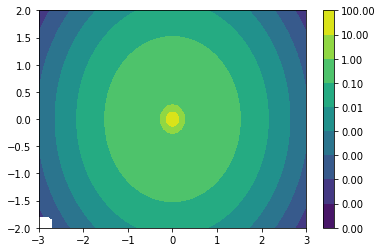

In [4]:
# alternatively, you can manually set the levels and the norm:
fig, ax = plt.subplots()

lev_exp = np.arange(np.floor(np.log10(z.min()) - 1), np.ceil(np.log10(z.max()) + 1))
levs = np.power(10, lev_exp)
cs = ax.contourf(x, y, z, levs, norm=cm.colors.LogNorm())
cbar = fig.colorbar(cs)

plt.show()